In [44]:
from ipyleaflet.leaflet import Icon
from numpy.lib.stride_tricks import sliding_window_view
import ee
import folium
import geemap.foliumap as geemap
from google.colab import drive
from google.colab import auth
import time 

date_start="-03-14"
date_end="-03-25"
def upload(image,description,scale,region,folder):
  drive.mount("/content/gdrive",force_remount=True)
  task = ee.batch.Export.image.toDrive(**{"image": image, "description": description, "scale": scale,"region": region, "crs": "EPSG:4326","folder": folder, 'fileFormat': 'GeoTIFF','skipEmptyTiles': True})
  task.start()
  while task.active():
    print('==> Polling for task (id: {}) Current Status: {}.'.format(task.id,task.status().get("state")))
    time.sleep(5)
  print("*** Task {} status is {}.".format(task.id,task.status().get("state")))

def filter_collection(concentration,year,boundaries): 
    start=year+date_start
    end=year+date_end
    filtered=concentration.filterDate(start, end).select("tropospheric_NO2_column_number_density").median().clip(boundaries)
    return filtered

def visualization(image):
  viz = {'min': 0, 'max': 0.0002, 'palette': ["#54bebe", "#76c8c8", "#98d1d1", "#badbdb", "#dedad2", "#e4bcad", "#df979e", "#d7658b", "#c80064"]}
  return image.visualize(**viz)

def print_thumbs(image,region):
   thumbnail=image.getThumbURL({
  'dimensions': 500,
  'region': region,})
   print("* Check out online the thumbnail URL: {}".format(thumbnail))
   

try:
  ee.Initialize()
except Exception as e:
  ee.Authenticate()
  ee.Initialize()

boundaries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')
italian_boundaries = boundaries.filter(ee.Filter.eq('country_na', 'Italy'))
no2_concentration=ee.ImageCollection("COPERNICUS/S5P/NRTI/L3_NO2")
no2_concentration_2019=filter_collection(no2_concentration,"2019",italian_boundaries)
no2_concentration_2020=filter_collection(no2_concentration,"2020",italian_boundaries)
no2_concentration_difference=no2_concentration_2019.subtract(no2_concentration_2020)
no2_concentration_2019_viz=visualization(no2_concentration_2019)
no2_concentration_2020_viz=visualization(no2_concentration_2020)
no2_concentration_difference_viz=visualization(no2_concentration_difference)
upload(no2_concentration_2019_viz,"Nitrogen_Dioxide_Concentration_Italy_2019",1000,italian_boundaries.geometry(),"covid19_no2_italy")
upload(no2_concentration_2020_viz,"Nitrogen_Dioxide_Concentration_Italy_2020",1000,italian_boundaries.geometry(),"covid19_no2_italy")
upload(no2_concentration_difference_viz,"Nitrogen_Dioxide_Concentration_Italy_Difference",1000,italian_boundaries.geometry(),"covid19_no2_italy")
print_thumbs(no2_concentration_2019_viz,italian_boundaries.geometry())
print_thumbs(no2_concentration_2020_viz,italian_boundaries.geometry())
print_thumbs(no2_concentration_difference_viz,italian_boundaries.geometry())
Map = geemap.Map(center=[40,12], zoom=5)
Map.addLayer(no2_concentration_difference_viz)
Map.add_marker([46,10],popup='This is where the main difference is spotted.',icon=folium.Icon(color="orange",icon="stats"))
Map


Mounted at /content/gdrive
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: READY.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: READY.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: RUNNING.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: RUNNING.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: RUNNING.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: RUNNING.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: RUNNING.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: RUNNING.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: RUNNING.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: RUNNING.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: RUNNING.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) Current Status: RUNNING.
==> Polling for task (id: TLRWDZJJRLMGEFAHQDHPHSVL) C

In [96]:
import ee
import folium
import geemap.foliumap as geemap
from google.colab import drive
from google.colab import auth
import time 

date_start="2020-01-01"
date_end="2021-01-01"
def upload(image,description,scale,region,folder):
  drive.mount("/content/gdrive",force_remount=True)
  task = ee.batch.Export.image.toDrive(**{"image": image, "description": description, "scale": scale,"region": region, "crs": "EPSG:4326","folder": folder, 'fileFormat': 'GeoTIFF','skipEmptyTiles': True})
  task.start()
  while task.active():
    print('==> Polling for task (id: {}) Current Status: {}.'.format(task.id,task.status().get("state")))
    time.sleep(5)
  print("*** Task {} status is {}.".format(task.id,task.status().get("state")))

def filter_collection(concentration,metric_type,boundaries): 
    filtered=concentration.filterDate(date_start, date_end).select(metric_type).max().multiply(0.0001).clip(boundaries)
    return filtered

def visualization(image):
  viz = {'min': 0, 'max': 1, 'palette': ["#593a0e","#72601b","#818c3c","#25591f","#19270d"]}
  return image.visualize(**viz)

def print_thumbs(image,region,name):
   thumbnail=image.getThumbURL({
  'dimensions': 500,
  'region': region,})
   print("* Check out online the {} thumbnail URL: {}".format(name,thumbnail))
   

try:
  ee.Initialize()
except Exception as e:
  ee.Authenticate()
  ee.Initialize()

boundaries = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017')
maltese_boundaries = boundaries.filter(ee.Filter.eq('country_na', 'Malta'))
modis_collection=ee.ImageCollection("MODIS/006/MOD13Q1")
evi=filter_collection(modis_collection,"EVI",maltese_boundaries)
ndvi=filter_collection(modis_collection,"NDVI",maltese_boundaries)
evi_viz=visualization(evi)
ndvi_viz=visualization(ndvi)
upload(evi_viz,"EVI_MALTA_2020",50,maltese_boundaries.geometry(),"vegetation_malta")
upload(ndvi_viz,"NDVI_MALTA_2020",50,maltese_boundaries.geometry(),"vegetation_malta")
print_thumbs(evi_viz,maltese_boundaries.geometry(),"EVI")
print_thumbs(ndvi_viz,maltese_boundaries.geometry(),"NDVI")
Map = geemap.Map(center=[35.95,14.4], zoom=11)
Map.addLayer(evi_viz)
Map.add_marker([36.06,14.25],popup='Enhanced Vegetation Index , Malta',icon=folium.Icon(color="green",icon="leaf"))
Map



Mounted at /content/gdrive
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: READY.
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: READY.
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: READY.
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: RUNNING.
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: RUNNING.
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: RUNNING.
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: RUNNING.
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: RUNNING.
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: RUNNING.
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: RUNNING.
==> Polling for task (id: 47NJZMGTHE4IKX3FJ7W23HZE) Current Status: RUNNING.
*** Task 47NJZMGTHE4IKX3FJ7W23HZE status is COMPLETED.
Mounted at /content/gdrive
==> Polling for task (id: FUU5UHEN5SXMW6SS2EEO6UIO

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:38: ProplotWarning: fig.tight_layout() has no effect on proplot figures. Proplot uses its own tight layout algorithm that is activated by default. To disable it, set pplt.rc['subplots.tight'] to False or pass tight=False to pplt.subplots(). For details, see fig.auto_layout().


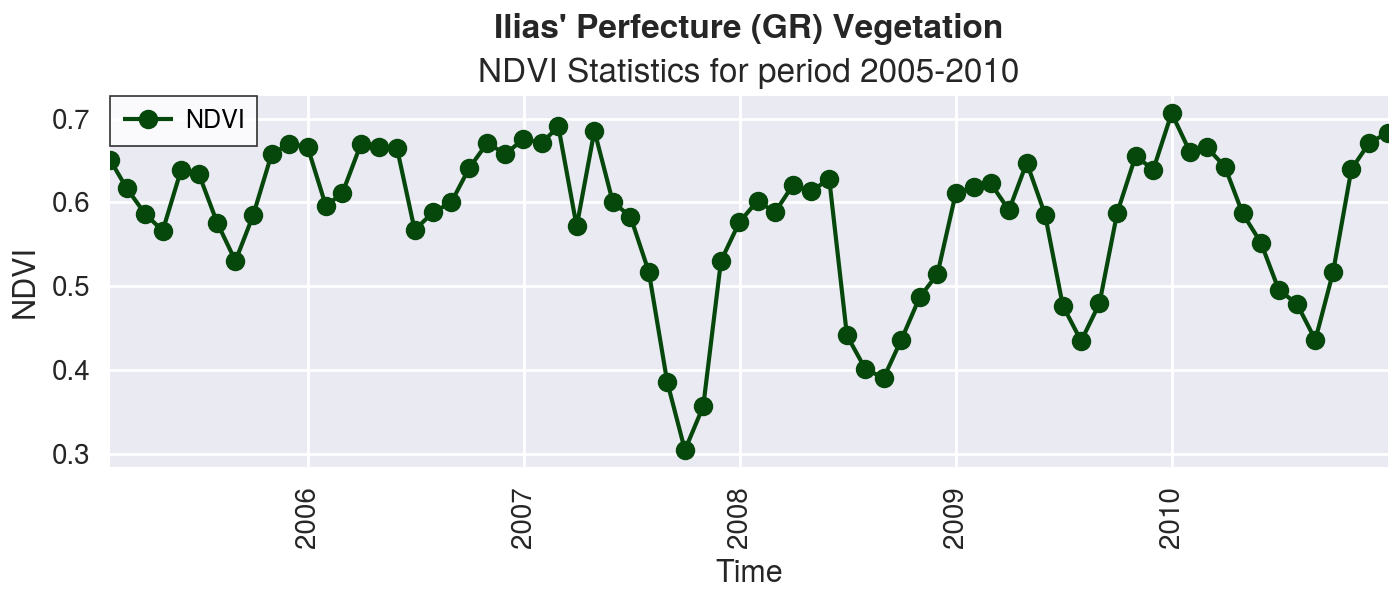

In [218]:
import ee
from google.colab import drive
import time 
import ipygee as ui
import numpy as np 
import pandas as pd 
import proplot as plot 
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
import matplotlib.dates as mdates
date_start="2005-01-01"
date_end="2010-12-31"
coordinates=ee.Geometry.Point([21.6, 37.75])
modis_collection=ee.ImageCollection("MODIS/006/MOD13Q1")

time_series = (modis_collection
               .filterDate(date_start,date_end)
               .select("NDVI")
               .map(lambda image: image.multiply(0.0001).copyProperties(image,['system:time_start']))
)

chart_ts = ui.chart.Image.series(**{
    'imageCollection': time_series, 
    'region': coordinates,
    'reducer': ee.Reducer.mean(),
    'scale': 10
})
chart_ts_monthly = chart_ts.dataframe.groupby(pd.Grouper(freq="M")).mean()
time = chart_ts_monthly.index
_, ndvi = plot.subplots(suptitle="Ilias' Perfecture (GR) Vegetation",figsize=(7, 3), tight=True)
ndvi.plot(time,chart_ts_monthly,label="NDVI",
        color='forest green', marker='o')
ndvi.set_xlabel("Time")
ndvi.set_ylabel("NDVI")
ndvi.set_yticks(np.arange(0.2, 0.8, 0.1))
ndvi.format(style='seaborn',title="NDVI Statistics for period 2005-2010")
plt.legend()
plt.tight_layout()
plot.show()


In [301]:
import ee
import geemap.foliumap as geemap
from google.colab import drive
from google.colab import auth
import time 
attica = (ee.Geometry.Polygon(
        [[[23.2110357389274, 38.206070688868856],
          [23.2110357389274, 37.64494364729591],
          [24.08582211588052, 37.64494364729591],
          [24.08582211588052, 38.206070688868856]]], None, False))
structures = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([23.722832311060202, 37.98604269504621]),
            {
              "LandCover": 1,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([23.710890150499324, 37.99027102964008]),
            {
              "LandCover": 1,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([23.676222541035628, 37.98857907511565]),
            {
              "LandCover": 1,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([23.701401776563813, 38.01387358385549]),
            {
              "LandCover": 1,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([23.82830641360839, 38.01233050123234]),
            {
              "LandCover": 1,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([23.728895081552206, 38.08468021862973]),
            {
              "LandCover": 1,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([23.676248683007895, 37.978157732338055]),
            {
              "LandCover": 1,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([23.679939402612387, 37.97827612962173]),
            {
              "LandCover": 1,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([23.87738330659633, 37.990118837548145]),
            {
              "LandCover": 1,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([23.78413321887467, 38.07986031790876]),
            {
              "LandCover": 1,
              "system:index": "9"
            }),
        ee.Feature(
            ee.Geometry.Point([23.563576671053916, 38.04361976373704]),
            {
              "LandCover": 1,
              "system:index": "10"
            }),
        ee.Feature(
            ee.Geometry.Point([23.59330426872514, 38.059778091142825]),
            {
              "LandCover": 1,
              "system:index": "11"
            })])
water = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([23.661676788635305, 37.92286610660872]),
            {
              "LandCover": 2,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([23.606454817647155, 37.94277636475712]),
            {
              "LandCover": 2,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([23.566160943434728, 37.95246236508979]),
            {
              "LandCover": 2,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([23.548347889191284, 37.97215440850505]),
            {
              "LandCover": 2,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([23.557383521816433, 37.9925483457881]),
            {
              "LandCover": 2,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([23.581542779533766, 38.01865365633532]),
            {
              "LandCover": 2,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([23.72075141678619, 38.045474530117644]),
            {
              "LandCover": 2,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([23.72351600311909, 37.865651364242176]),
            {
              "LandCover": 2,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([23.69433356903706, 37.91848460455896]),
            {
              "LandCover": 2,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([23.611249462591747, 37.87486604280219]),
            {
              "LandCover": 2,
              "system:index": "9"
            }),
        ee.Feature(
            ee.Geometry.Point([24.041532969565065, 38.056532165817096]),
            {
              "LandCover": 2,
              "system:index": "10"
            }),
        ee.Feature(
            ee.Geometry.Point([24.029516673178346, 37.87816578326174]),
            {
              "LandCover": 2,
              "system:index": "11"
            }),
        ee.Feature(
            ee.Geometry.Point([23.89715677701301, 38.1690285963769]),
            {
              "LandCover": 2,
              "system:index": "12"
            }),
        ee.Feature(
            ee.Geometry.Point([24.013121609318013, 38.148720744718474]),
            {
              "LandCover": 2,
              "system:index": "13"
            })])
soil = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([23.616151642612902, 37.94237918207922]),
            {
              "LandCover": 3,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([23.635493051819292, 37.94633892126388]),
            {
              "LandCover": 3,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([23.630629645151025, 37.96863322738643]),
            {
              "LandCover": 3,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([23.627149097070358, 37.98167109187658]),
            {
              "LandCover": 3,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([23.656465474772705, 38.02321147196569]),
            {
              "LandCover": 3,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([23.72004798626504, 38.03370011121143]),
            {
              "LandCover": 3,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([23.74978178584261, 38.05532582091939]),
            {
              "LandCover": 3,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([23.64523813785602, 38.06003275047307]),
            {
              "LandCover": 3,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([23.65040722606349, 38.08403646029273]),
            {
              "LandCover": 3,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([23.938562789819855, 38.08512120649901]),
            {
              "LandCover": 3,
              "system:index": "9"
            }),
        ee.Feature(
            ee.Geometry.Point([23.75462075061929, 38.07118174433912]),
            {
              "LandCover": 3,
              "system:index": "10"
            })])
vegetation = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([23.75906440392205, 38.00491312489803]),
            {
              "LandCover": 4,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([23.748706479272343, 37.98244170404808]),
            {
              "LandCover": 4,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([23.738396067819096, 37.98749849407307]),
            {
              "LandCover": 4,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([23.73529543419788, 37.9924196507234]),
            {
              "LandCover": 4,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([23.720242877206303, 38.035774125154276]),
            {
              "LandCover": 4,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([23.745595116815068, 38.0404807978776]),
            {
              "LandCover": 4,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([23.8135451599611, 37.966069613719995]),
            {
              "LandCover": 4,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([23.639833988292132, 38.007267208000144]),
            {
              "LandCover": 4,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([23.643224662603014, 38.02838971142539]),
            {
              "LandCover": 4,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([23.82074183384109, 38.05987324423261]),
            {
              "LandCover": 4,
              "system:index": "9"
            }),
        ee.Feature(
            ee.Geometry.Point([23.677353769871633, 37.99500727533915]),
            {
              "LandCover": 4,
              "system:index": "10"
            }),
        ee.Feature(
            ee.Geometry.Point([23.740902981293946, 38.14523926644351]),
            {
              "LandCover": 4,
              "system:index": "11"
            }),
        ee.Feature(
            ee.Geometry.Point([23.76675947619751, 38.150571677193945]),
            {
              "LandCover": 4,
              "system:index": "12"
            }),
        ee.Feature(
            ee.Geometry.Point([23.86022249564027, 38.096375762155034]),
            {
              "LandCover": 4,
              "system:index": "13"
            }),
        ee.Feature(
            ee.Geometry.Point([23.845642007435313, 38.09315878812063]),
            {
              "LandCover": 4,
              "system:index": "14"
            })])
roads = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([23.712586258793536, 37.98042396589105]),
            {
              "LandCover": 4,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([23.713689878001357, 37.983137310999076]),
            {
              "LandCover": 4,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([23.710267379298354, 37.98545432303957]),
            {
              "LandCover": 4,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([23.707247211947585, 37.96392612567052]),
            {
              "LandCover": 4,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([23.71991414201875, 37.96091134788731]),
            {
              "LandCover": 4,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([23.732641286521762, 37.99733844018295]),
            {
              "LandCover": 4,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([23.710683230905385, 38.00500665205455]),
            {
              "LandCover": 4,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([23.745581335419324, 37.90627778822394]),
            {
              "LandCover": 4,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([23.667236408439155, 37.94512221607737]),
            {
              "LandCover": 4,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([23.831226871541478, 38.02580847405912]),
            {
              "LandCover": 4,
              "system:index": "9"
            }),
        ee.Feature(
            ee.Geometry.Point([24.008861817683822, 37.77324325196618]),
            {
              "LandCover": 4,
              "system:index": "10"
            })])
denseVegetation = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([23.81373750572194, 37.96608332212135]),
            {
              "LandCover": 5,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([23.78310039679273, 37.99381080914337]),
            {
              "LandCover": 5,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([23.5979126397775, 37.992760249026695]),
            {
              "LandCover": 5,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([23.710779190182027, 38.13538285434384]),
            {
              "LandCover": 5,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([23.718552073068125, 38.178352873495086]),
            {
              "LandCover": 5,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([23.86538281554469, 38.099125959468715]),
            {
              "LandCover": 5,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([23.813735723216915, 38.06183397235706]),
            {
              "LandCover": 5,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([23.737832913610312, 37.993573446229874]),
            {
              "LandCover": 5,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([23.748803148481223, 37.98211578398123]),
            {
              "LandCover": 5,
              "system:index": "8"
            }),
        ee.Feature(
            ee.Geometry.Point([23.736682804635656, 37.9731004891005]),
            {
              "LandCover": 5,
              "system:index": "9"
            })])
lightVegetation = ee.FeatureCollection(
        [ee.Feature(
            ee.Geometry.Point([23.67009396905085, 38.02718502351752]),
            {
              "LandCover": 6,
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([23.671043088444208, 38.04438445313574]),
            {
              "LandCover": 6,
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([23.788523561542004, 37.92294159624229]),
            {
              "LandCover": 6,
              "system:index": "2"
            }),
        ee.Feature(
            ee.Geometry.Point([23.847929126803844, 38.08652324014357]),
            {
              "LandCover": 6,
              "system:index": "3"
            }),
        ee.Feature(
            ee.Geometry.Point([23.581813673063213, 37.97672917135574]),
            {
              "LandCover": 6,
              "system:index": "4"
            }),
        ee.Feature(
            ee.Geometry.Point([23.724902260543423, 38.03985223490778]),
            {
              "LandCover": 6,
              "system:index": "5"
            }),
        ee.Feature(
            ee.Geometry.Point([23.718062627555447, 38.0405958172099]),
            {
              "LandCover": 6,
              "system:index": "6"
            }),
        ee.Feature(
            ee.Geometry.Point([23.74674286610224, 38.04445634613339]),
            {
              "LandCover": 6,
              "system:index": "7"
            }),
        ee.Feature(
            ee.Geometry.Point([23.901402168915833, 38.01741832543896]),
            {
              "LandCover": 6,
              "system:index": "8"
            })])

class_bands=["B2", "B3", "B4", "B5", "B6", "B7", "NDVI", "NDBI"]
def indices(image):
  ndvi=image.normalizedDifference(["B5", "B4"]).rename("NDVI")
  ndbi=image.normalizedDifference(["B6", "B5"]).rename("NDBI")
  return image.addBands(ndvi).addBands(ndbi)

def upload(image,description,scale,region,folder):
  drive.mount("/content/gdrive",force_remount=True)
  task = ee.batch.Export.image.toDrive(**{"image": image, "description": description, "scale": scale,"region": region, "crs": "EPSG:4326","folder": folder, 'fileFormat': 'GeoTIFF','skipEmptyTiles': True})
  task.start()
  while task.active():
    print('==> Polling for task (id: {}) Current Status: {}.'.format(task.id,task.status().get("state")))
    time.sleep(5)
  print("*** Task {} status is {}.".format(task.id,task.status().get("state")))

def print_thumbs(image,region):
   thumbnail=image.getThumbURL({
  'dimensions': 500,
  'region': region,})
   print("* Check out online the thumbnail URL: {}".format(thumbnail))

def visualization(image,palette):
  viz = {'min': 1, 'max': len(palette), 'palette':palette}
  return image.visualize(**viz)

def add_elements(input,objects):
  for obj in objects:
    input.append(obj)
  return input

palette=["#6D6D6D","#69BFE8","#E67C5C","#72A64B"]# [urban,water,soil,vegetation]
palette_extended=["#6D6D6D","#3BB3F9","#E67C5C","#000000","#3F7724","#90E570"] #[urban,water,soil,roads,dense vegetation,light vegetation]
#3BB3F9
landsat = (ee.ImageCollection("LANDSAT/LC08/C01/T1_SR")
    .filterDate('2019-05-01', '2019-08-31') 
    .filterBounds(attica)
    .filterMetadata("CLOUD_COVER", "less_than", 1)
    .median()
    .clip(attica)
    )
landsat=indices(landsat).select(class_bands)
print("=====> Initiating Supervised Training 1")
training_samples=ee.FeatureCollection([])
training_samples=training_samples.merge(structures).merge(soil).merge(vegetation).merge(water)
training_data=landsat.select(class_bands).sampleRegions(**{"collection": training_samples,"properties": ["LandCover"],"scale": 30})
classifier=ee.Classifier.smileRandomForest(20).train(**{"features": training_data,"classProperty": "LandCover","inputProperties": class_bands,})
landsat_classified=landsat.classify(classifier)
Map = geemap.Map(center=[37.84494364729591,23.58582211588052], zoom=9)
land_class_viz=visualization(landsat_classified,palette)
print("=====> Initiating Supervised Training 2 - Extended")
training_samples_ext=ee.FeatureCollection([])
training_samples_ext=training_samples_ext.merge(roads).merge(structures).merge(water).merge(soil).merge(denseVegetation).merge(lightVegetation)
training_data_ext=landsat.select(class_bands).sampleRegions(**{"collection": training_samples_ext,"properties": ["LandCover"],"scale": 30})
classifier_ext=ee.Classifier.smileRandomForest(50).train(**{"features": training_data_ext,"classProperty": "LandCover","inputProperties": class_bands,})
landsat_classified_ext=landsat.classify(classifier_ext)
land_class_viz_ext=visualization(landsat_classified_ext,palette_extended)
print("***** Check out the available thumbnails")
print_thumbs(land_class_viz,attica)
print_thumbs(land_class_viz_ext,attica)
print("***** Uploading data to drive")
upload(land_class_viz,"Attica_Landcover",50,attica,"attica_landcover")
upload(land_class_viz_ext,"Attica_Landcover_Extended",50,attica,"attica_landcover")
Map.addLayer(land_class_viz_ext)
Map

=====> Initiating Supervised Training 1
=====> Initiating Supervised Training 2 - Extended
***** Check out the available thumbnails
* Check out online the thumbnail URL: https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/089ec1677ecdfea380b60e933953262c-8427446ef4cda212bc00c6bdf939c442:getPixels
* Check out online the thumbnail URL: https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/thumbnails/b4f34f6bba304e6e0fe8d1707770fbd3-07fb93b1c5934a8981577f7d4f7a5bdf:getPixels
***** Uploading data to drive
Mounted at /content/gdrive
==> Polling for task (id: NI4INR6RBYLE3PLC67I5I3JD) Current Status: READY.
==> Polling for task (id: NI4INR6RBYLE3PLC67I5I3JD) Current Status: READY.
==> Polling for task (id: NI4INR6RBYLE3PLC67I5I3JD) Current Status: RUNNING.
==> Polling for task (id: NI4INR6RBYLE3PLC67I5I3JD) Current Status: RUNNING.
==> Polling for task (id: NI4INR6RBYLE3PLC67I5I3JD) Current Status: RUNNING.
==> Polling for task (id: NI4INR6RBYLE